#  Multivariate Regression

> Multivariate or Multi-Output regression are the problems having more than one vairable to predict.One of the such case is this [Gas Turbine CO and NOx Emission Data Set](https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set 'Go To Dataset') .Here We need to predict the emission of two gases from the data available.
>> We can use multivariate regression with different approches.The Basic idea of this can get from this blog. [ \<blog\> ](https://machinelearningmastery.com/multi-output-regression-models-with-python/ 'How to Develop Multi-Output Regression Models with Python')


> The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2).By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.We create Machine Learning regression model for predicting this flue gas emissions.

> I used Linear regression and Decision Tree Regressor from sklearn module for multivariate analysis . For checking prediction of this method I seprately predicted the dependant variable one by one with the data and then checked the [combined result.](#conc)

## Gas Turbine - NOX and CO emmission prediction

## Table Of Content:
* [Basic Data Preprocessing](#basic)
1. [Data Discription](#description)
2. [Outliers Handling](#outlier)
* [Machine Learning Model](#model)
1. [Multioutput Models](#multi-model)
2. [Multioutput Model Results](#model_result)
3. [Individual Target Model](#ind_model)
4. [Individual Model Results](#ind_result)

* [Conclusion](#conc)

### <a id="basic"></a> Basic Data preprocessing

In [1]:
#Importing required Module:

import pandas as pd # for basic Data handling using python.
import numpy as np # for math operation.
import warnings # clearning warnings about older version.
import matplotlib.pyplot as plt # for handling plots
import seaborn as sns # visulization 
import glob # handling files

# Settng default parameters for notebook
files=glob.glob("*.csv") # get all the csv files 
%matplotlib inline 
plt.style.use('seaborn-darkgrid')
palette=sns.color_palette('magma',10)
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None # to display all columns in Notebook
#pd.options.display.float_format='{:.3f}'.format   # decimal format. comment out it beacause some columns has 
                                                    # values upto 5 deciaml point and can be important


In [2]:
# Important Modules for Model Building:

from sklearn.preprocessing import StandardScaler,MinMaxScaler # For standerdizing data
from sklearn.model_selection import train_test_split # splitting data into test,train sets
from sklearn.linear_model import LinearRegression # Linear Regression Algorithm
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Algorithm

In [3]:
# Important modules to check model performance:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
# files we have in our notebook folder:
files
# we required all this files .so we concat it ahead

['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

In [5]:
# Concating all the files
df=pd.concat(map(pd.read_csv,files),ignore_index=True)

In [6]:
# First 5 records:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [7]:
# Last 5 records
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
36732,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


#### <a id="description"></a> Description:
___
<b>Variable (Abbr.) Unit Min Max Mean </b>
- Ambient temperature **(AT)** C
- Ambient pressure **(AP)** mbar 
- Ambient humidity **(AH)** (%) 
- Air filter difference pressure **(AFDP)** mbar 
- Gas turbine exhaust pressure **(GTEP)** mbar 
- Turbine inlet temperature **(TIT)** C 
- Turbine after temperature **(TAT)** C 
- Compressor discharge pressure **(CDP)** mbar 
- Turbine energy yield **(TEY)** MWH 
- Carbon monoxide **(CO)** mg/m3 
- Nitrogen oxides **(NOx)** mg/m3 
___

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


<code style="background:yellow;color:black"><b>- There are No null values in this dataset.<br>- All the features are of Dtype float,so no feature encoding required.</b>
</code>

In [9]:
# check on columns:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [10]:
# checking data validity
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


<code style="background:yellow;color:black"><b>- Feature 'CO' :the value of 75th percentile and max value has big difference .that shows presence of outliers.<br>- So checking and removing outliers can help for a good model Performance.</b>
</code>

#### <a id='outlier'> </a> Outlier Handling

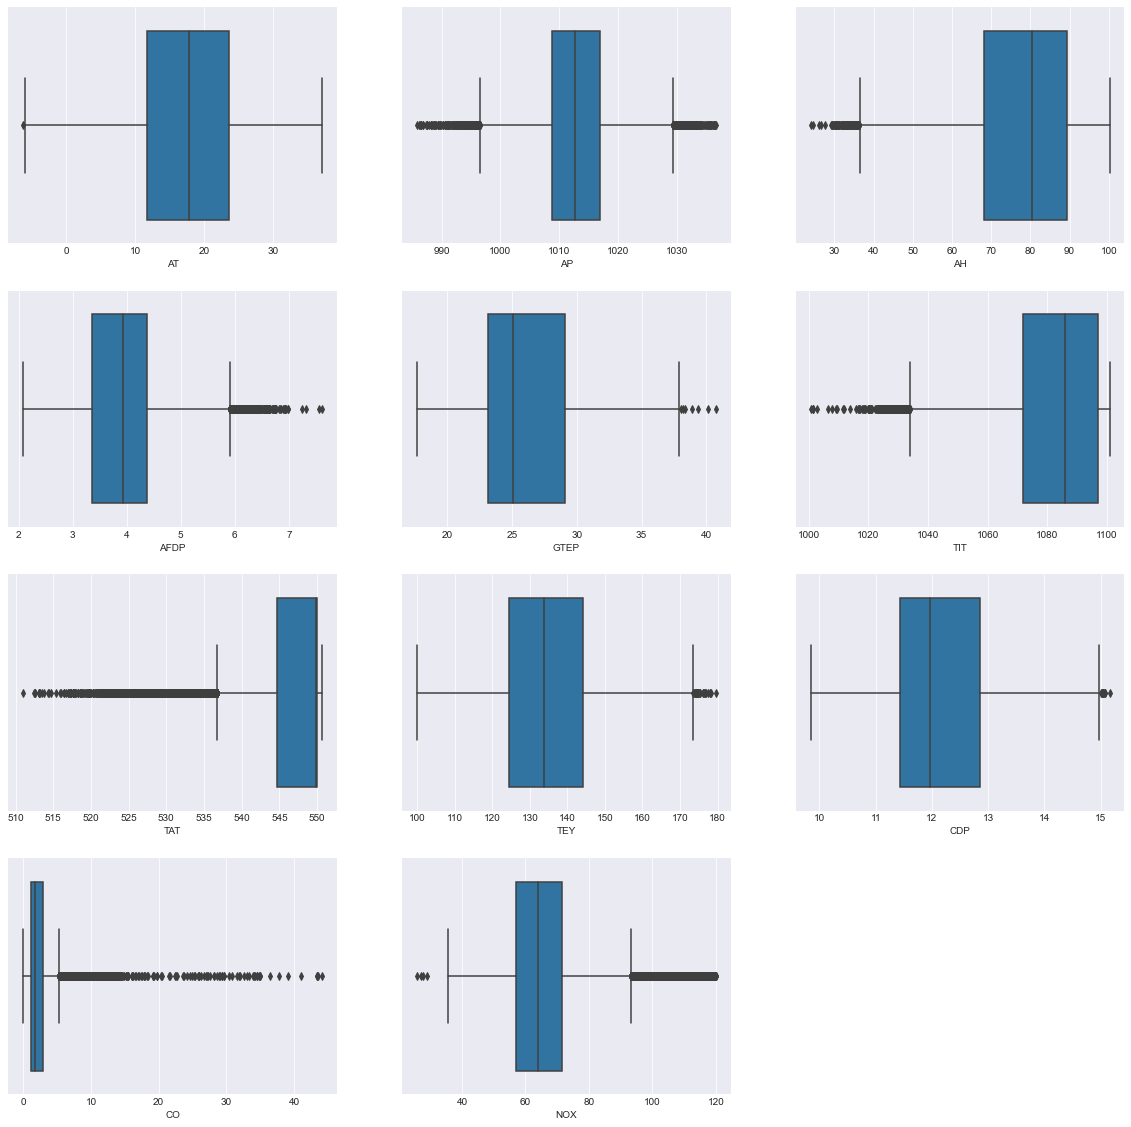

In [11]:
# checking outliers with boxplot from seaborn module.
rows=4
colm=3
pos=1
plt.figure(figsize=(20,20))
for col in df.columns:
    plt.subplot(rows,colm,pos)
    sns.boxplot(df[col])

    pos+=1

<code style="background:yellow;color:black"><b>- Feature CO & TAT has more numbers of outliers .<br>\- We can remove this outliers by deciding interquantile range .
</b></code>

In [12]:
# function to remove outliers
def outlier_remove(df):
    data=df.copy()  # use a copy of original data so we can have the original data for later use.
    for col in data.columns:
        if data[col].dtypes !='object': # we do not have any columns of dtype as object , but this function can be used in other dataset too.
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1  # Interquantile range
            lower=Q1-(1.5*IQR)
            upper=Q3+(1.5*IQR)
            data=data[data[col]>=lower]
            data=data[data[col]<=upper]
            data.reset_index(inplace=True,drop=True)
    
    return(data)


In [13]:
# Applying outlier removal function to our dataset.
df_new=outlier_remove(df) 

In [14]:
df.shape

(36733, 11)

In [15]:
df_new.shape

(27791, 11)

### <a id='model'></a> <font size=4>Model Building

#### <a id='multi-model'></a> Multioutput Models

In [16]:
# Creating target and independant variable.
data=df_new.copy()
X=data.drop(['CO','NOX'],axis=1) # CO and NOC are the target variables we remove it from independant variable list.
y=data[['CO','NOX']] 

In [17]:
# Function that transform data in scaled form and creates Linear Regression model.
def Lin_regression(train_x,test_x,train_y,test_y,scaler):

    trainx=train_x.copy()
    testx=test_x.copy()
    trainy=train_y.copy()
    testy=test_y.copy()
    if scaler == 'minmax':
        mm=MinMaxScaler()
        train_x_scale=mm.fit_transform(trainx)
        test_x_scale=mm.transform(testx)

    elif scaler == 'standerd':
        ss=StandardScaler()
        train_x_scale = ss.fit_transform(trainx)
        test_x_scale = ss.transform(testx)

    else:
        print('invalid scaler parameter:\n\t"minmax":minmax scaler\n\t"standerd":standerd scaler')
        
    model=LinearRegression().fit(train_x_scale,trainy)
    test_y_pred=model.predict(test_x_scale)
    print('R squared value of test=  {:.3f}'.format(r2_score(testy,test_y_pred)))
    print('Mean Squared error value Of test=  {:.3f}'.format(mean_squared_error(testy,test_y_pred)))
    print('Root Mean Squared error value Of test=  {:.3f}'.format(np.sqrt(mean_squared_error(testy,test_y_pred))))

    return(test_y_pred)
    

In [18]:
# Function that transform data in scaled form and creates Decision Tree Regression model.
def DT_regression(train_x,test_x,train_y,test_y,scaler):
    trainx=train_x.copy()
    testx=test_x.copy()
    trainy=train_y.copy()
    testy=test_y.copy()

    if scaler == 'minmax':
        mm=MinMaxScaler()
        train_x_scale=mm.fit_transform(trainx)
        test_x_scale=mm.transform(testx)

    elif scaler == 'standerd':
        ss=StandardScaler()
        train_x_scale = ss.fit_transform(trainx)
        test_x_scale = ss.transform(testx)
    else:
        print('invalid scaler parameter:\n\t"minmax":minmax scaler\n\t"standerd":standerd scaler')

    model=DecisionTreeRegressor(criterion='mse').fit(train_x_scale,trainy)
    test_y_pred=model.predict(test_x_scale)
    print('R squared value of test=  {:.3f}'.format(r2_score(testy,test_y_pred)))
    print('Mean Squared error value Of test=  {:.3f}'.format(mean_squared_error(testy,test_y_pred)))
    print('Root Mean Squared error value Of test=  {:.3f}'.format(np.sqrt(mean_squared_error(testy,test_y_pred))))

    return(test_y_pred)


In [19]:
# Splitting data into train and test where target has multiple output features.
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=111)

In [20]:
# First Prediction : Linear Regression model (scaler=minmax)
lin_pred1=Lin_regression(x_train,x_test,y_train,y_test,'minmax')

R squared value of test=  0.652
Mean Squared error value Of test=  14.053
Root Mean Squared error value Of test=  3.749


In [21]:
# Second Prediction : Linear Regression model (scaler=standerd)
lin_pred2=Lin_regression(x_train,x_test,y_train,y_test,'standerd')

R squared value of test=  0.652
Mean Squared error value Of test=  14.053
Root Mean Squared error value Of test=  3.749


In [22]:
# Third Prediction : Decision Tree Regressor model (scaler=minmax)
DT_pred1=DT_regression(x_train,x_test,y_train,y_test,'minmax')

R squared value of test=  0.637
Mean Squared error value Of test=  12.427
Root Mean Squared error value Of test=  3.525


In [23]:
# Fourth Prediction : Decision Tree Regressor model (scaler=standerd)
DT_pred2=DT_regression(x_train,x_test,y_train,y_test,'standerd')

R squared value of test=  0.637
Mean Squared error value Of test=  12.659
Root Mean Squared error value Of test=  3.558


<a id='model_result'></a>
<code style="background:red;color:white"><b>Multioutput Model Results:</b> </code>

|Model|R_squared|MSE|RMSE|
|-----|---------|---|----|
|Linear(Minmax scale Data)|0.652|14.053|3.749|
|Linear(standerd scale Data)|0.652|14.053|3.749|
|DT Regressor(Minmax scale Data)|0.637|12.427|3.525|
|DT Regressor(standerd scale Data)|0.637|12.659|3.558|

<code style="background:yellow;color:black"><b><font size=3>Decision Tree Regressor with Minmax Transformation gives minimum RMSE than other models so we use it for Individual prediction .</b> </code>


#### <a id='ind_model'></a> Building individual model for each target : (Using DT regressor with minmax-scaler)
___

In [24]:
# Splitting data for individual target.
train_x1,test_x1,train_y1,test_y1=train_test_split(data.drop(['CO','NOX'],1),data.NOX,test_size=0.25,random_state=111) # data for NOX as a target.
train_x2,test_x2,train_y2,test_y2=train_test_split(data.drop(['CO','NOX'],1),data.CO,test_size=0.25,random_state=111) # data for CO as a target.

In [25]:
# Prediction of NOX
DT_pred_NOX=DT_regression(train_x1,test_x1,train_y1,test_y1,'minmax')

R squared value of test=  0.746
Mean Squared error value Of test=  24.200
Root Mean Squared error value Of test=  4.919


In [26]:
# prediction of CO
DT_pred_CO=DT_regression(train_x2,test_x2,train_y2,test_y2,'minmax')

R squared value of test=  0.619
Mean Squared error value Of test=  0.551
Root Mean Squared error value Of test=  0.742


In [27]:
# Creaating a dataframe of actual vs prediction
ind_pred=pd.DataFrame()
ind_pred['CO']=test_y2
ind_pred['NOX']=test_y1
ind_pred['CO Pred']=DT_pred_CO
ind_pred['NOX Pred']=DT_pred_NOX
ind_pred.reset_index(inplace=True,drop=True)

<a id='ind_result'></a><code style="background:red;color:white"><b>Individual Model Results:</b> </code>

In [28]:
ind_pred.sample(10)

,CO,NOX,CO Pred,NOX Pred
6034,0.53323,60.020,1.6048,60.655
5741,1.21340,64.102,1.1608,64.886
1236,1.80690,84.715,2.2912,74.709
6738,4.48640,49.710,1.6762,51.021
1400,3.78920,46.331,4.1344,46.559
1174,1.33480,70.464,1.2526,71.151
6423,1.60990,64.537,1.5311,84.886
4415,3.57500,72.198,3.2046,76.052
2810,1.57770,54.983,1.7563,54.895
3709,1.82860,54.219,1.2103,56.006


In [29]:
# results:
print('R squared value of test=  {:.3f}'.format(r2_score(ind_pred.iloc[:,:2],ind_pred.iloc[:,2:4])))
print('Mean Squared error value Of test=  {:.3f}'.format(mean_squared_error(ind_pred.iloc[:,:2],ind_pred.iloc[:,2:4])))
print('Root Mean Squared error value Of test=  {:.3f}'.format(np.sqrt(mean_squared_error(ind_pred.iloc[:,:2],ind_pred.iloc[:,2:4]))))


R squared value of test=  0.682
Mean Squared error value Of test=  12.376
Root Mean Squared error value Of test=  3.518


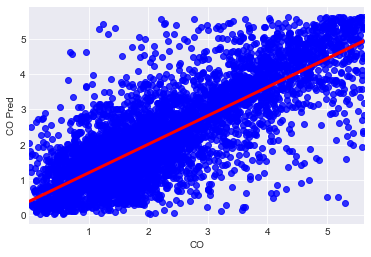

In [30]:
# Regression Line Plot
sns.regplot(ind_pred.CO,ind_pred['CO Pred'], scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
plt.show()

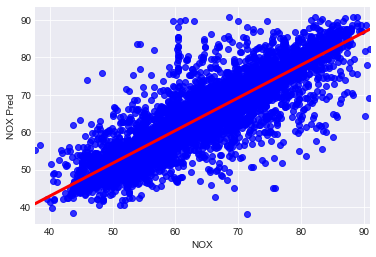

In [31]:
# Regression Line Plot
sns.regplot(ind_pred.NOX,ind_pred['NOX Pred'], scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
plt.show()

### <a id='conc'></a> Conclusion:

|Results|By Multioutput Model|By Combining Result|
|-------|--------------------|-------------------|
|R2 score|0.637|0.682|
|MSE|12.427|12.376|
|RMSE|3.525|3.518|


<br>
<b>A combined model prediction performs well than a multioutput model.But we can still use multioutput model if  the performance difference is acceptable.</b>

